In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_file = pd.read_csv("emission.csv") #reading 
print("shape of the file:",csv_file.shape)
print("total missing values:",csv_file.isna().sum().sum())
#csv_file.isna().sum()

shape of the file: (708, 26)
total missing values: 3194


In [4]:
csv_file.fillna(csv_file.median(numeric_only=True),inplace=True)

In [5]:
csv_file

,Unnamed: 0,Country,Year,Ores and metals exports (% of merchandise exports),Fuel exports (% of merchandise exports),"Energy imports, net (% of energy use)","Electricity production from renewable sources, excluding hydroelectric (% of total)","Electricity production from oil, gas and coal sources (% of total)",Land area (sq. km),Forest area (sq. km),...,Nitrous oxide (N2O) emissions from Fugitive Emissions (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e),Methane (CH4) emissions from Transport (Energy) (Mt CO2e),Methane (CH4) emissions from Industrial Combustion (Energy) (Mt CO2e),Electricity production from oil sources (% of total),GDP per capita (constant 2015 US$),"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)",Fossil fuel energy consumption (% of total),GDP per unit of energy use (PPP $ per kg of oil equivalent),Energy use (kg of oil equivalent per capita)
0,0,Algeria,2010,0.291217,98.310876,-275.463486,0.000000,99.619539,2381740.0,19180.0,...,0.0506,16.8060,0.3866,0.0093,2.107841,4497.861365,100.000000,99.847835,12.820274,1117.980489
1,1,Algeria,2011,0.255946,98.333323,-248.734824,0.000000,99.019991,2381740.0,19256.0,...,0.0482,18.5702,0.4226,0.0086,2.084960,4545.677998,100.000000,99.887476,12.919460,1144.322850
2,2,Algeria,2012,0.246080,98.400410,-212.765932,0.000000,98.916320,2381740.0,19332.0,...,0.0655,20.3291,0.4660,0.0073,1.845044,4565.200327,100.000000,99.858917,11.827642,1233.616948
3,3,Algeria,2013,0.167012,98.339769,-189.345469,0.000000,99.448990,2381740.0,19408.0,...,0.0690,22.6020,0.4893,0.0074,1.506095,4592.676570,100.000000,99.910365,11.602512,1252.074795
4,4,Algeria,2014,0.179691,97.228400,-177.124358,0.000000,99.604620,2381740.0,19484.0,...,0.0749,21.5743,0.4982,0.0071,0.993120,4687.288575,100.000000,99.977917,11.148744,1333.136069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,703,Zimbabwe,2017,31.208664,0.729203,13.311432,3.377242,68.675614,386850.0,175827.9,...,0.0007,0.8806,0.0145,0.0075,1.804215,1421.240769,100.000000,80.554344,10.029444,2764.516671
704,704,Zimbabwe,2018,30.073459,1.010572,13.311432,3.377242,68.675614,386850.0,175367.2,...,0.0007,1.0326,0.0194,0.0077,1.804215,1462.590279,88.722667,80.554344,10.029444,2764.516671
705,705,Zimbabwe,2019,35.167480,1.126097,13.311432,3.377242,68.675614,386850.0,174906.5,...,0.0007,1.0188,0.0159,0.0076,1.804215,1342.989586,88.722667,80.554344,10.029444,2764.516671
706,706,Zimbabwe,2020,44.758812,1.102937,13.311432,3.377242,68.675614,386850.0,174445.8,...,0.0006,0.8040,0.0140,0.0075,1.804215,1213.117057,88.722667,80.554344,10.029444,2764.516671


In [6]:
csv_file = csv_file.drop("Unnamed: 0",axis=1)

In [7]:
csv_file

,Country,Year,Ores and metals exports (% of merchandise exports),Fuel exports (% of merchandise exports),"Energy imports, net (% of energy use)","Electricity production from renewable sources, excluding hydroelectric (% of total)","Electricity production from oil, gas and coal sources (% of total)",Land area (sq. km),Forest area (sq. km),Agricultural land (sq. km),...,Nitrous oxide (N2O) emissions from Fugitive Emissions (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e),Methane (CH4) emissions from Transport (Energy) (Mt CO2e),Methane (CH4) emissions from Industrial Combustion (Energy) (Mt CO2e),Electricity production from oil sources (% of total),GDP per capita (constant 2015 US$),"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)",Fossil fuel energy consumption (% of total),GDP per unit of energy use (PPP $ per kg of oil equivalent),Energy use (kg of oil equivalent per capita)
0,Algeria,2010,0.291217,98.310876,-275.463486,0.000000,99.619539,2381740.0,19180.0,413740.00,...,0.0506,16.8060,0.3866,0.0093,2.107841,4497.861365,100.000000,99.847835,12.820274,1117.980489
1,Algeria,2011,0.255946,98.333323,-248.734824,0.000000,99.019991,2381740.0,19256.0,413880.00,...,0.0482,18.5702,0.4226,0.0086,2.084960,4545.677998,100.000000,99.887476,12.919460,1144.322850
2,Algeria,2012,0.246080,98.400410,-212.765932,0.000000,98.916320,2381740.0,19332.0,413981.90,...,0.0655,20.3291,0.4660,0.0073,1.845044,4565.200327,100.000000,99.858917,11.827642,1233.616948
3,Algeria,2013,0.167012,98.339769,-189.345469,0.000000,99.448990,2381740.0,19408.0,414316.35,...,0.0690,22.6020,0.4893,0.0074,1.506095,4592.676570,100.000000,99.910365,11.602512,1252.074795
4,Algeria,2014,0.179691,97.228400,-177.124358,0.000000,99.604620,2381740.0,19484.0,414310.00,...,0.0749,21.5743,0.4982,0.0071,0.993120,4687.288575,100.000000,99.977917,11.148744,1333.136069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Zimbabwe,2017,31.208664,0.729203,13.311432,3.377242,68.675614,386850.0,175827.9,162000.00,...,0.0007,0.8806,0.0145,0.0075,1.804215,1421.240769,100.000000,80.554344,10.029444,2764.516671
704,Zimbabwe,2018,30.073459,1.010572,13.311432,3.377242,68.675614,386850.0,175367.2,162000.00,...,0.0007,1.0326,0.0194,0.0077,1.804215,1462.590279,88.722667,80.554344,10.029444,2764.516671
705,Zimbabwe,2019,35.167480,1.126097,13.311432,3.377242,68.675614,386850.0,174906.5,162000.00,...,0.0007,1.0188,0.0159,0.0076,1.804215,1342.989586,88.722667,80.554344,10.029444,2764.516671
706,Zimbabwe,2020,44.758812,1.102937,13.311432,3.377242,68.675614,386850.0,174445.8,162000.00,...,0.0006,0.8040,0.0140,0.0075,1.804215,1213.117057,88.722667,80.554344,10.029444,2764.516671


In [8]:
#feature engineering 
csv_file['Population, female'] = ((csv_file['Population, female (% of total population)'])/(100-csv_file['Population, female (% of total population)']))*csv_file['Population, male']
csv_file['Total Population'] = csv_file['Population, female'] + csv_file['Population, male']
csv_file['Urbanization Ratio'] = csv_file['Urban population']/(csv_file['Rural population']+csv_file['Urban population']) * 1000
csv_file['Agricultural Support'] = csv_file['Agricultural land (sq. km)']/csv_file['Total Population'] * 10000
csv_file['Total N2O emissions'] = csv_file['Nitrous oxide (N2O) emissions from Fugitive Emissions (Energy) (Mt CO2e)']+csv_file['Nitrous oxide (N2O) emissions from Power Industry (Energy) (Mt CO2e)']
csv_file['Total CH4 emissions'] = csv_file['Methane (CH4) emissions from Industrial Combustion (Energy) (Mt CO2e)']+csv_file['Methane (CH4) emissions from Transport (Energy) (Mt CO2e)']
csv_file['Total CO2 emissions'] = csv_file['Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)']
# Apply log transformation on skewed columns
csv_file['Log CO2 emissions'] = np.log1p(csv_file['Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)'])
csv_file['Log N2O emissions'] = np.log1p(csv_file['Total N2O emissions'])
csv_file['Log CH4 emissions'] = np.log1p(csv_file['Total CH4 emissions'])
# Year-over-year change for CO2 and N2O emissions
csv_file['CO2 emissions YoY change'] = csv_file.groupby('Country')['Total CO2 emissions'].pct_change()
csv_file['N2O emissions YoY change'] = csv_file.groupby('Country')['Total N2O emissions'].pct_change()
csv_file['CH4 emissions YoY change'] = csv_file.groupby('Country')['Total CH4 emissions'].pct_change()


In [9]:
csv_file.columns = ['Country', 'Year', 'Ores & Metals Exports (%)', 'Fuel Exports (%)',
    'Energy Imports (%)', 'Renewable Electricity (%)', 'Fossil Electricity (%)',
    'Land Area (sq km)', 'Forest Area (sq km)', 'Agricultural Land (sq km)',
    'Urban Pop', 'Rural Pop', 'Male Pop', 'Female Pop (%)', 'N2O Emissions Power (Mt)',
    'N2O Emissions Fugitive (Mt)', 'CO2 Emissions Building (Mt)',
    'CH4 Emissions Transport (Mt)', 'CH4 Emissions Industry (Mt)',
    'Oil-based Electricity (%)', 'GDP per Capita (USD)',
    'PM2.5 Exposure (%)', 'Fossil Fuel Use (%)', 'Energy GDP Efficiency',
    'Energy Use per Capita', 'Female Pop', 'Total Pop', 'Urban/Rural Ratio',
    'Agri Land per 10k Pop', 'Total N2O Emissions', 'Total CH4 Emissions',
    'Total CO2 Emissions', 'Log CO2 Emissions', 'Log N2O Emissions', 'Log CH4 Emissions',
    'CO2 YoY Change (%)', 'N2O YoY Change (%)', 'CH4 YoY Change (%)'
]


In [10]:
csv_file.columns

Index(['Country', 'Year', 'Ores & Metals Exports (%)', 'Fuel Exports (%)',
       'Energy Imports (%)', 'Renewable Electricity (%)',
       'Fossil Electricity (%)', 'Land Area (sq km)', 'Forest Area (sq km)',
       'Agricultural Land (sq km)', 'Urban Pop', 'Rural Pop', 'Male Pop',
       'Female Pop (%)', 'N2O Emissions Power (Mt)',
       'N2O Emissions Fugitive (Mt)', 'CO2 Emissions Building (Mt)',
       'CH4 Emissions Transport (Mt)', 'CH4 Emissions Industry (Mt)',
       'Oil-based Electricity (%)', 'GDP per Capita (USD)',
       'PM2.5 Exposure (%)', 'Fossil Fuel Use (%)', 'Energy GDP Efficiency',
       'Energy Use per Capita', 'Female Pop', 'Total Pop', 'Urban/Rural Ratio',
       'Agri Land per 10k Pop', 'Total N2O Emissions', 'Total CH4 Emissions',
       'Total CO2 Emissions', 'Log CO2 Emissions', 'Log N2O Emissions',
       'Log CH4 Emissions', 'CO2 YoY Change (%)', 'N2O YoY Change (%)',
       'CH4 YoY Change (%)'],
      dtype='object')

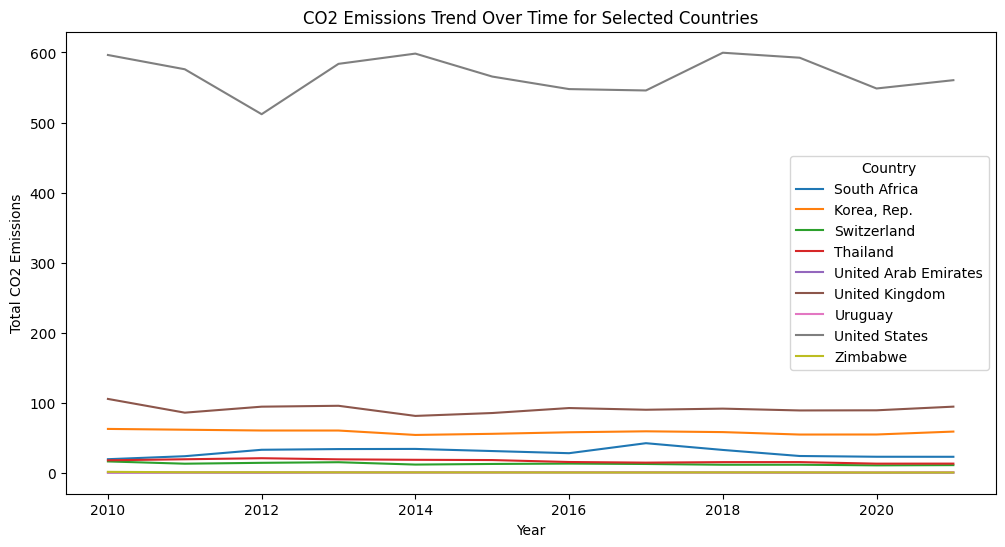

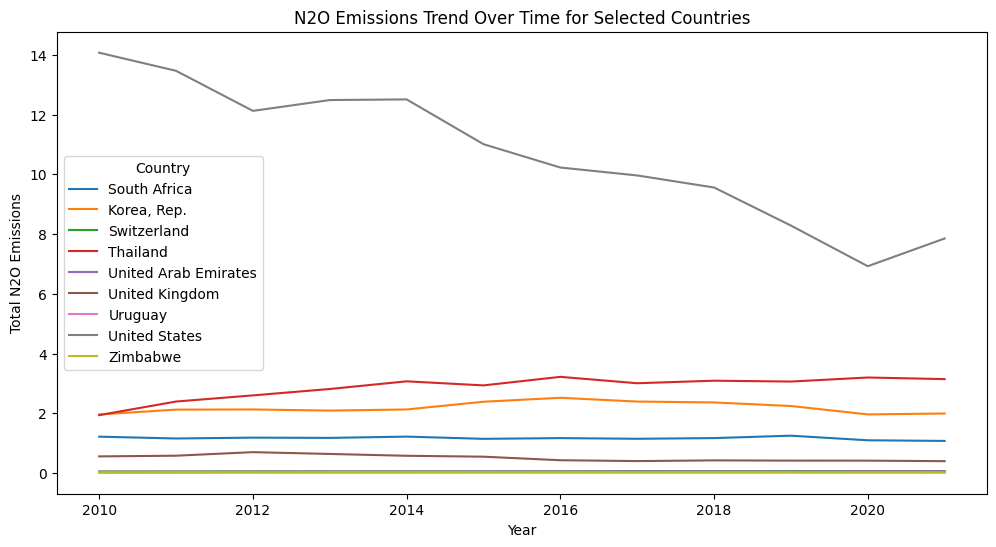

array(['South Africa', 'Korea, Rep.', 'Switzerland', 'Thailand',
       'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'United States', 'Zimbabwe'], dtype=object)

In [11]:
# Select a few sample countries for trend analysis
sample_countries = csv_file['Country'].unique()[50:60]  # Adjust number as needed

# Filter data for selected countries
sample_data = csv_file[csv_file['Country'].isin(sample_countries)]

# Line plot for CO2 emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sample_data, x='Year', y='Total CO2 Emissions', hue='Country')
plt.title("CO2 Emissions Trend Over Time for Selected Countries")
plt.show()

# Line plot for N2O emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sample_data, x='Year', y='Total N2O Emissions', hue='Country')
plt.title("N2O Emissions Trend Over Time for Selected Countries")
plt.show()

sample_countries

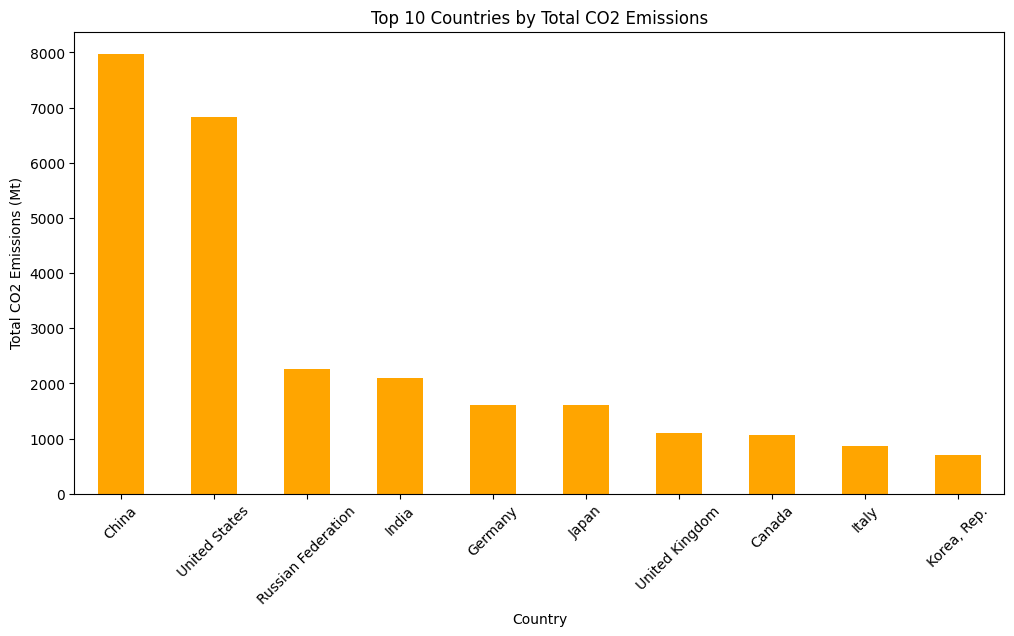

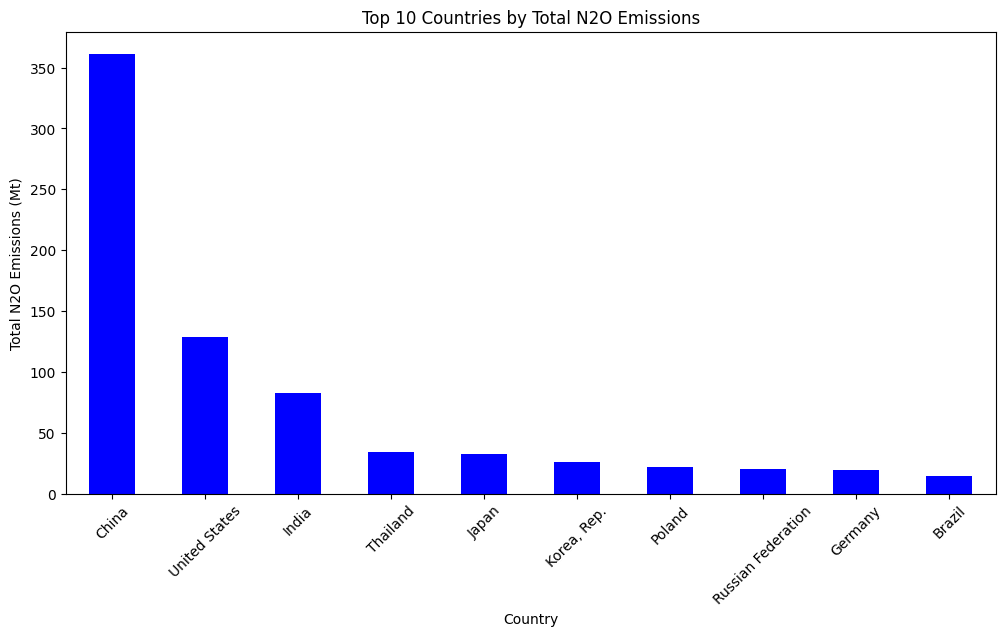

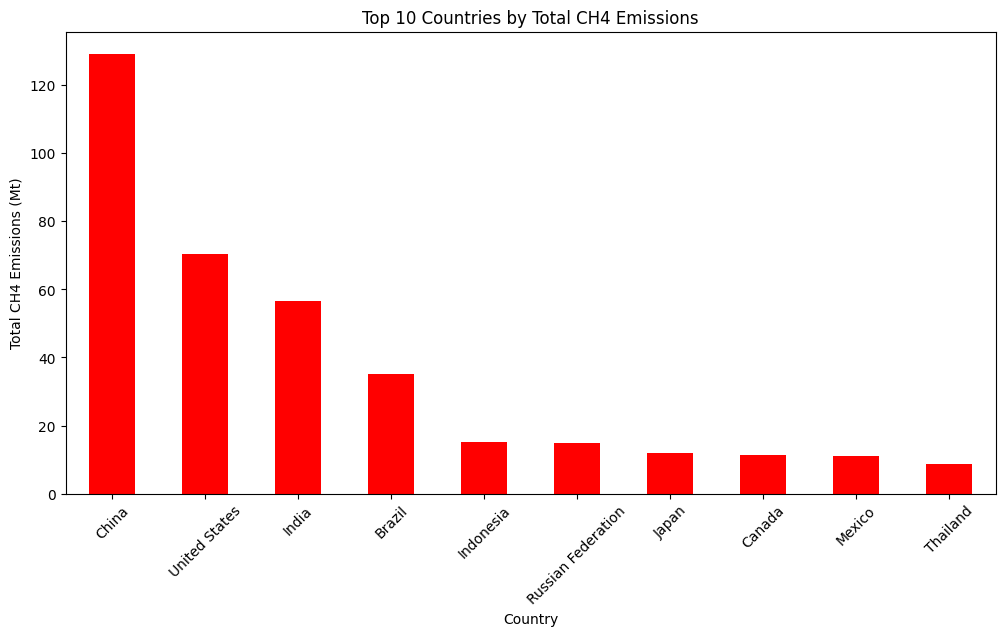

In [12]:
# Get top 10 countries by CO2 emissions
top_co2_emitters = csv_file.groupby('Country')['Total CO2 Emissions'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_co2_emitters.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Total CO2 Emissions")
plt.ylabel("Total CO2 Emissions (Mt)")
plt.xticks(rotation=45)
plt.show()

top_n2o_emitters = csv_file.groupby('Country')['Total N2O Emissions'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_n2o_emitters.plot(kind='bar', color='blue')
plt.title("Top 10 Countries by Total N2O Emissions")
plt.ylabel("Total N2O Emissions (Mt)")
plt.xticks(rotation=45)
plt.show()

top_ch4_emitters = csv_file.groupby('Country')['Total CH4 Emissions'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_ch4_emitters.plot(kind='bar', color='red')
plt.title("Top 10 Countries by Total CH4 Emissions")
plt.ylabel("Total CH4 Emissions (Mt)")
plt.xticks(rotation=45)
plt.show()


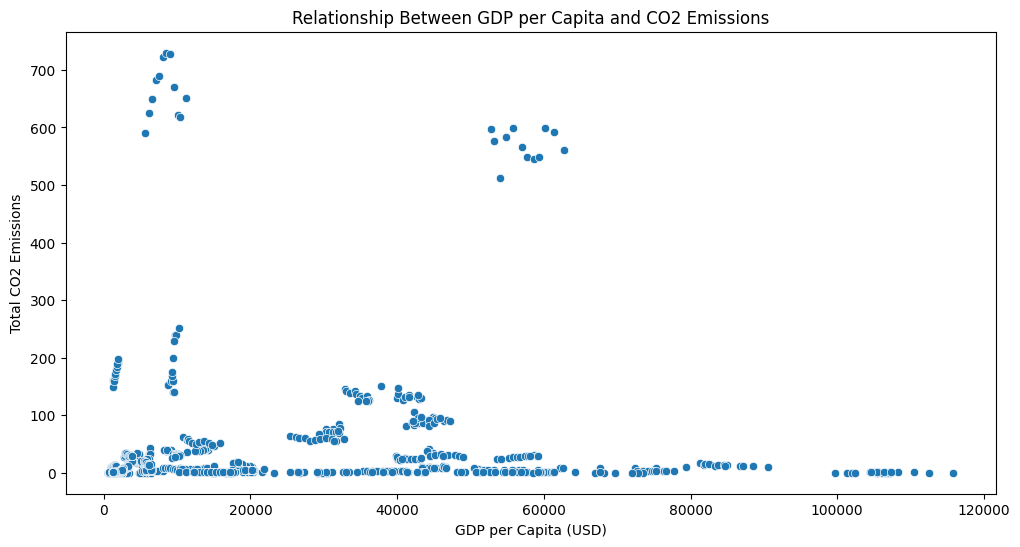

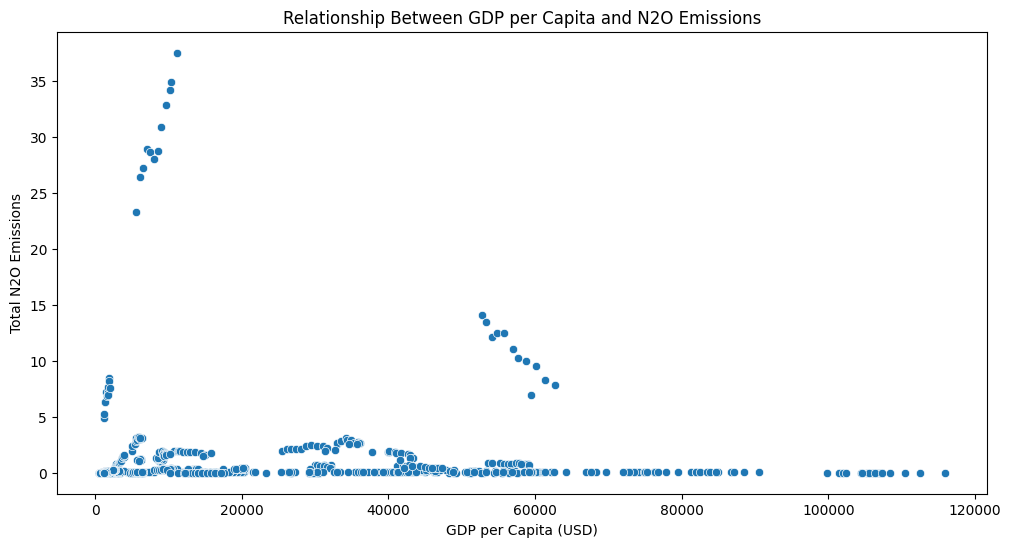

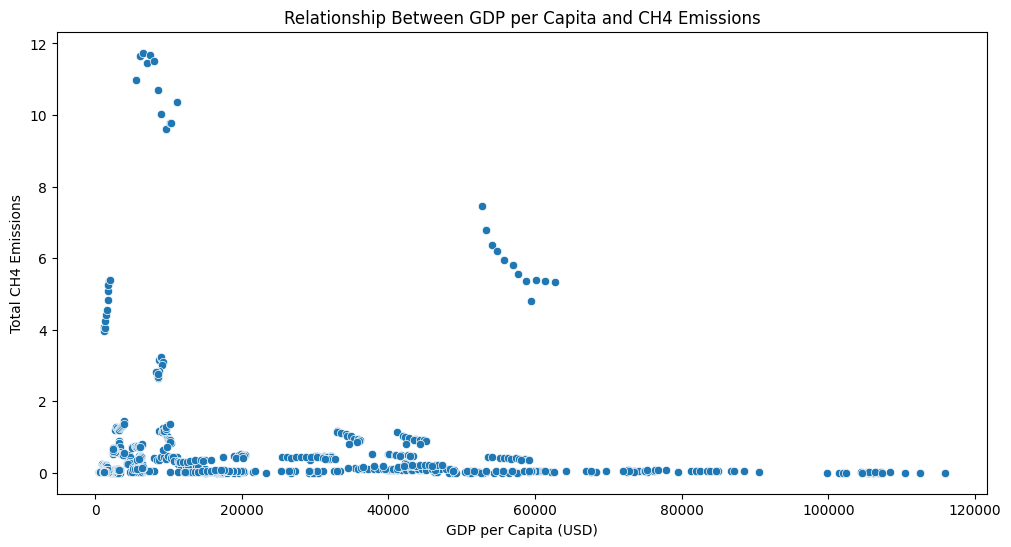

In [13]:
# Scatter plot for GDP vs Emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=csv_file, x='GDP per Capita (USD)', y='Total CO2 Emissions')
plt.title("Relationship Between GDP per Capita and CO2 Emissions")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=csv_file, x='GDP per Capita (USD)', y='Total N2O Emissions')
plt.title("Relationship Between GDP per Capita and N2O Emissions")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=csv_file, x='GDP per Capita (USD)', y='Total CH4 Emissions')
plt.title("Relationship Between GDP per Capita and CH4 Emissions")
plt.show()

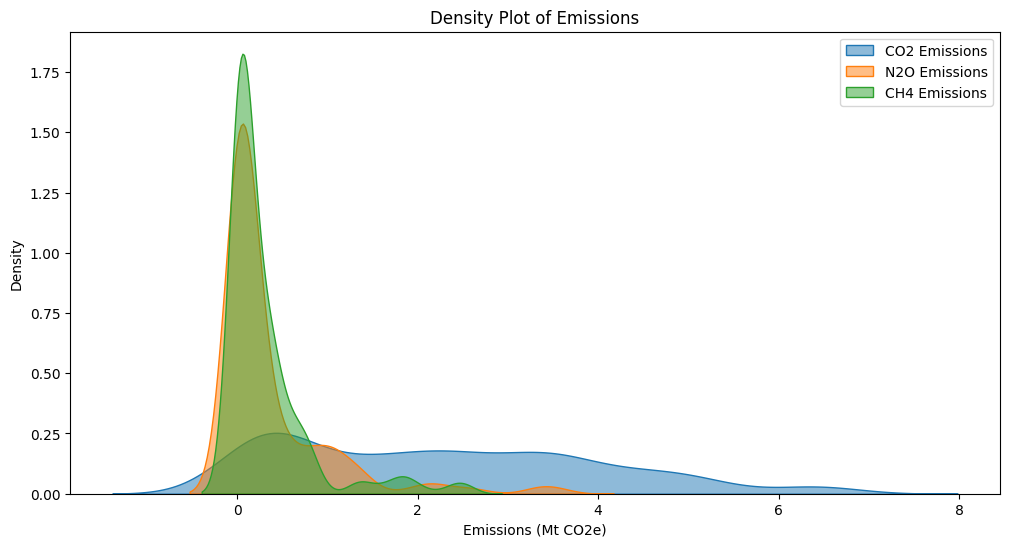

In [14]:
plt.figure(figsize=(12, 6))
sns.kdeplot(csv_file['Log CO2 Emissions'], label='CO2 Emissions', fill=True, alpha=0.5)
sns.kdeplot(csv_file['Log N2O Emissions'], label='N2O Emissions', fill=True, alpha=0.5)
sns.kdeplot(csv_file['Log CH4 Emissions'], label='CH4 Emissions', fill=True, alpha=0.5)
plt.title("Density Plot of Emissions")
plt.xlabel("Emissions (Mt CO2e)")
plt.legend()
plt.show()


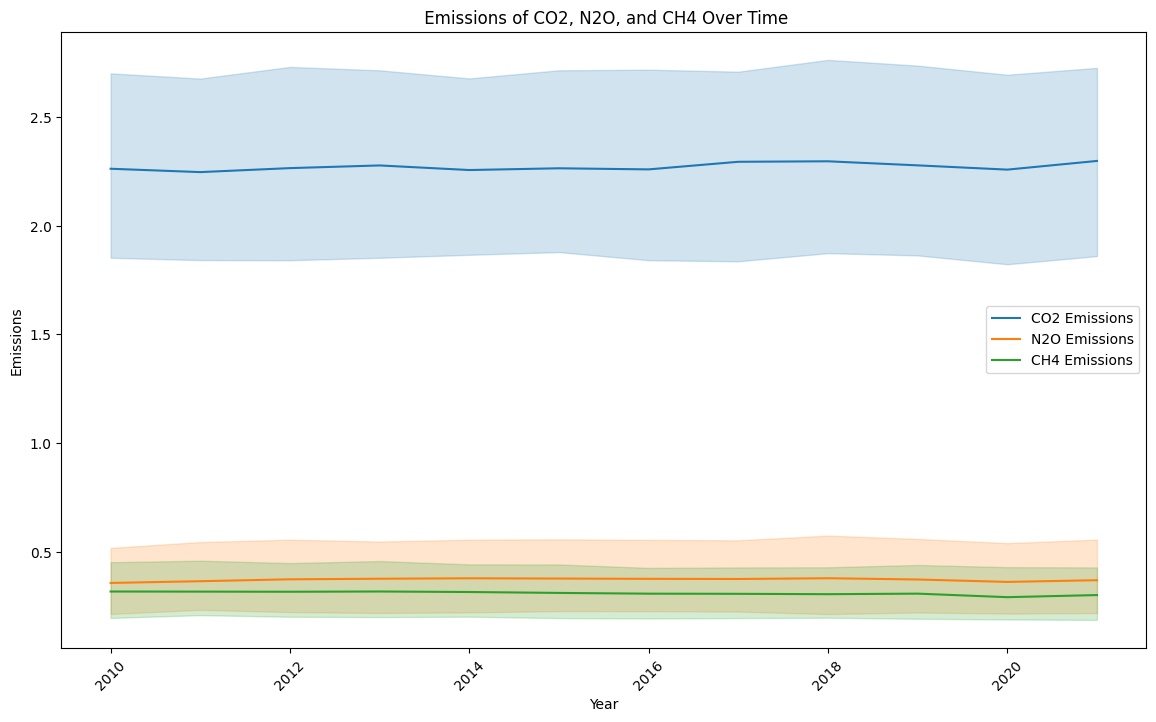

In [15]:

# Create a line plot for CO2, N2O, and CH4 emissions over the years
plt.figure(figsize=(14, 8))

# Plotting CO2 emissions
sns.lineplot(data=csv_file, x='Year', y='Log CO2 Emissions', label='CO2 Emissions', estimator='mean')

# Plotting N2O emissions
sns.lineplot(data=csv_file, x='Year', y='Log N2O Emissions', label='N2O Emissions', estimator='mean')

# Plotting CH4 emissions
sns.lineplot(data=csv_file, x='Year', y='Log CH4 Emissions', label='CH4 Emissions', estimator='mean')

# Enhancing the plot
plt.title(" Emissions of CO2, N2O, and CH4 Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [16]:
csv_file.columns

Index(['Country', 'Year', 'Ores & Metals Exports (%)', 'Fuel Exports (%)',
       'Energy Imports (%)', 'Renewable Electricity (%)',
       'Fossil Electricity (%)', 'Land Area (sq km)', 'Forest Area (sq km)',
       'Agricultural Land (sq km)', 'Urban Pop', 'Rural Pop', 'Male Pop',
       'Female Pop (%)', 'N2O Emissions Power (Mt)',
       'N2O Emissions Fugitive (Mt)', 'CO2 Emissions Building (Mt)',
       'CH4 Emissions Transport (Mt)', 'CH4 Emissions Industry (Mt)',
       'Oil-based Electricity (%)', 'GDP per Capita (USD)',
       'PM2.5 Exposure (%)', 'Fossil Fuel Use (%)', 'Energy GDP Efficiency',
       'Energy Use per Capita', 'Female Pop', 'Total Pop', 'Urban/Rural Ratio',
       'Agri Land per 10k Pop', 'Total N2O Emissions', 'Total CH4 Emissions',
       'Total CO2 Emissions', 'Log CO2 Emissions', 'Log N2O Emissions',
       'Log CH4 Emissions', 'CO2 YoY Change (%)', 'N2O YoY Change (%)',
       'CH4 YoY Change (%)'],
      dtype='object')

In [17]:
csv_file.describe()

,Year,Ores & Metals Exports (%),Fuel Exports (%),Energy Imports (%),Renewable Electricity (%),Fossil Electricity (%),Land Area (sq km),Forest Area (sq km),Agricultural Land (sq km),Urban Pop,...,Agri Land per 10k Pop,Total N2O Emissions,Total CH4 Emissions,Total CO2 Emissions,Log CO2 Emissions,Log N2O Emissions,Log CH4 Emissions,CO2 YoY Change (%),N2O YoY Change (%),CH4 YoY Change (%)
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,7.080000e+02,7.080000e+02,7.080000e+02,7.080000e+02,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,649.000000,649.000000,649.000000
mean,2015.500000,8.074264,20.097472,-8.027775,4.994392,65.764484,1.490165e+06,5.123718e+05,5.129789e+05,5.108282e+07,...,123.228390,1.182292,0.643675,45.480372,2.271560,0.370636,0.308430,0.019239,0.020054,0.001336
std,3.454493,13.158611,27.440187,106.624061,6.797480,21.183413,3.086896e+06,1.350439e+06,1.039833e+06,1.191323e+08,...,256.702963,4.208560,1.685047,115.726416,1.723378,0.651102,0.486338,0.138176,0.150038,0.102347
min,2010.000000,0.003185,0.000000,-944.892818,0.000000,0.011620,5.400000e+01,0.000000e+00,3.000000e+00,6.376400e+04,...,0.011572,0.000200,0.000300,0.008900,0.008861,0.000200,0.000300,-0.636691,-0.410714,-0.400000
25%,2012.750000,1.638618,1.989587,13.311432,3.377242,68.675614,6.889000e+04,6.896135e+03,1.527019e+04,3.752018e+06,...,14.050894,0.023750,0.026000,0.794825,0.584908,0.023472,0.025668,-0.036388,-0.036889,-0.040893
50%,2015.500000,3.184027,7.986255,13.311432,3.377242,68.675614,3.095000e+05,6.125625e+04,1.059577e+05,1.510961e+07,...,38.856905,0.072550,0.105550,7.919350,2.188201,0.070039,0.100343,0.008868,0.003484,-0.002508
75%,2018.250000,5.946004,22.720503,13.311432,3.377242,68.675614,1.109500e+06,2.182544e+05,4.132084e+05,4.089809e+07,...,99.632299,0.520775,0.452375,31.635950,3.485414,0.419218,0.373200,0.058890,0.057576,0.043956
max,2021.000000,79.971833,98.400410,97.701443,65.443742,100.000000,1.637687e+07,8.153116e+06,5.274623e+06,8.828945e+08,...,1773.144887,37.505300,11.740400,729.782900,6.594116,3.650796,2.544778,1.461619,2.151515,1.081511


In [18]:
# Compute the correlation matrix
correlation_matrix = csv_file.drop(['Country','Year'],axis=1).corr()
old_shape = csv_file.shape

#plt.figure(figsize=(50,50))
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Correlation Matrix")
#plt.show()

target_variables = ['Total CO2 Emissions', 'Total N2O Emissions','Total CH4 Emissions']
threshold = 0.2  
important_features = [col for col in correlation_matrix.columns if any(
    abs(correlation_matrix[col][target]) > threshold for target in target_variables)]
important_features = ['Country','Year','GDP per Capita (USD)'] + important_features

csv_file = csv_file[important_features] 


redundancy_threshold = 0.9
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > redundancy_threshold:
            columns_to_drop.add(correlation_matrix.columns[j])

# Drop redundant columns from the DataFrame
csv_file = csv_file.drop(columns=columns_to_drop)

print("important_features:",important_features)
print("cols to drop:",columns_to_drop)
print("Old shape:", old_shape)
print("New shape:", csv_file.shape)


important_features: ['Country', 'Year', 'GDP per Capita (USD)', 'Land Area (sq km)', 'Forest Area (sq km)', 'Agricultural Land (sq km)', 'Urban Pop', 'Rural Pop', 'Male Pop', 'N2O Emissions Power (Mt)', 'N2O Emissions Fugitive (Mt)', 'CO2 Emissions Building (Mt)', 'CH4 Emissions Transport (Mt)', 'CH4 Emissions Industry (Mt)', 'Female Pop', 'Total Pop', 'Total N2O Emissions', 'Total CH4 Emissions', 'Total CO2 Emissions', 'Log CO2 Emissions', 'Log N2O Emissions', 'Log CH4 Emissions']
cols to drop: {'N2O Emissions Power (Mt)', 'CH4 Emissions Industry (Mt)', 'Log CH4 Emissions', 'CH4 Emissions Transport (Mt)', 'Total CH4 Emissions', 'Total Pop', 'Total CO2 Emissions', 'Forest Area (sq km)', 'Male Pop', 'Total N2O Emissions', 'Female Pop'}
Old shape: (708, 38)
New shape: (708, 11)


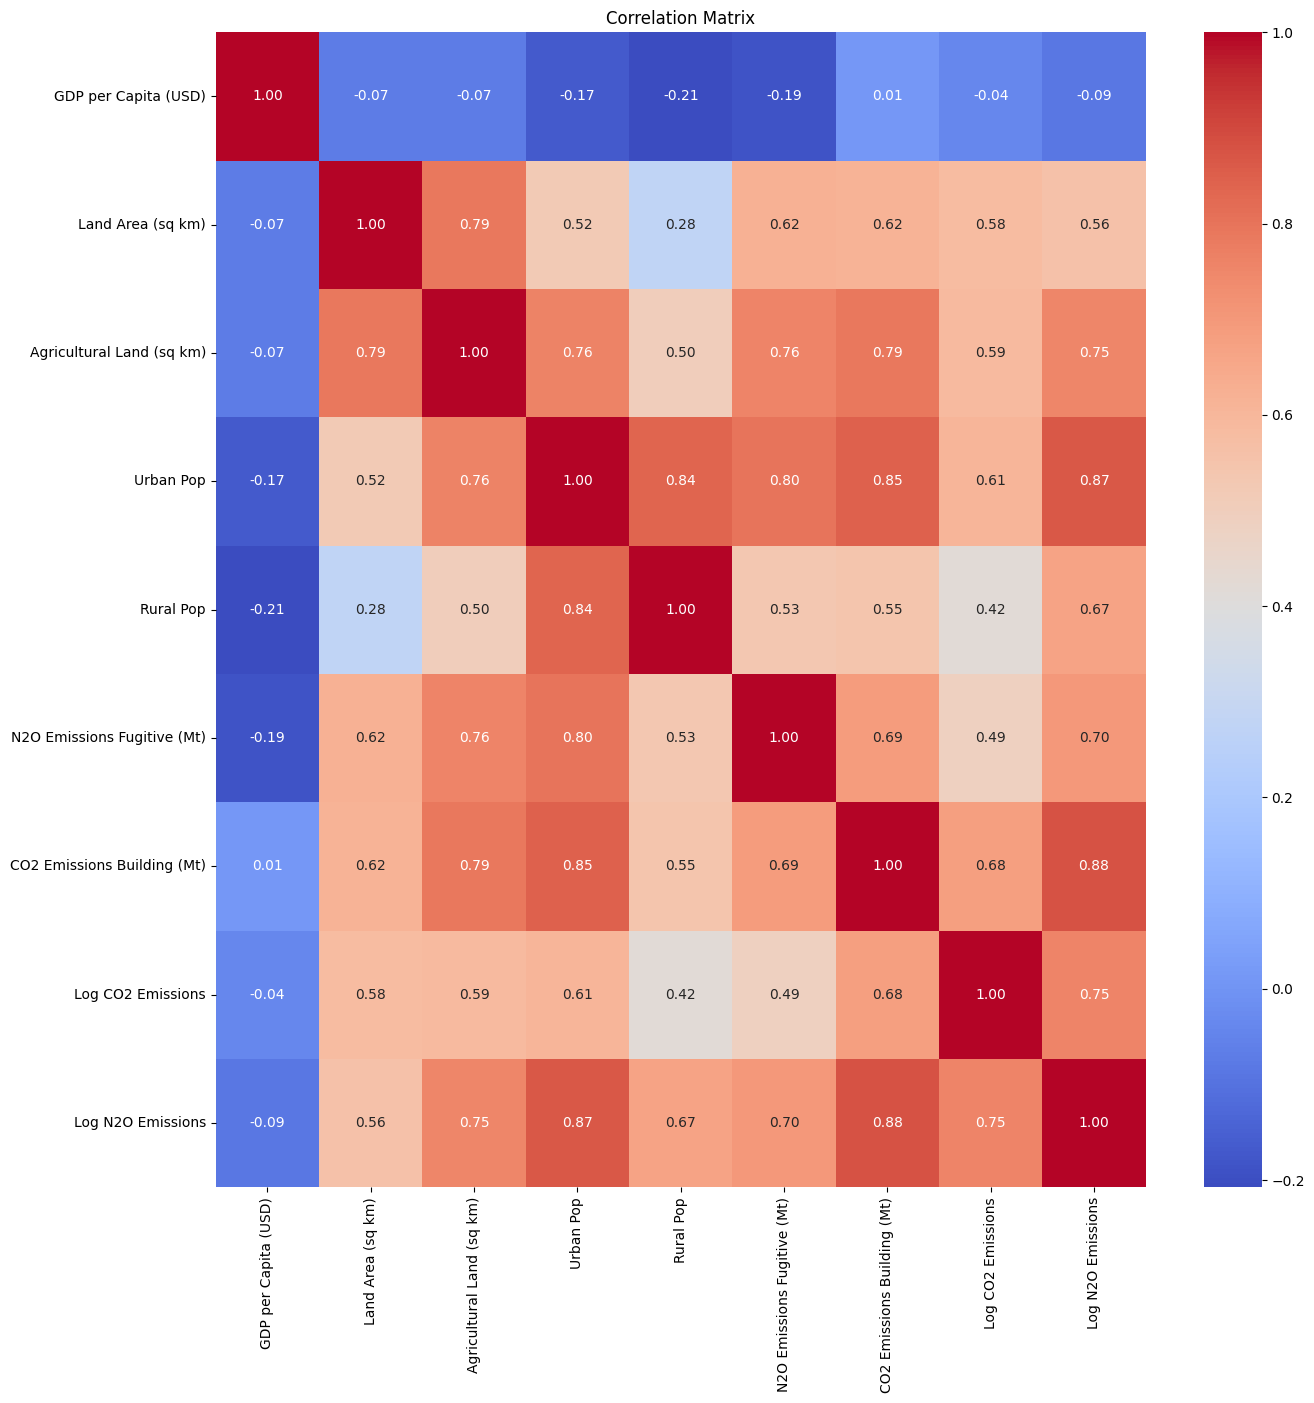

In [19]:
# Compute the correlation matrix
correlation_matrix = csv_file.drop(['Country','Year'],axis=1).corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [20]:
csv_file

,Country,Year,GDP per Capita (USD),Land Area (sq km),Agricultural Land (sq km),Urban Pop,Rural Pop,N2O Emissions Fugitive (Mt),CO2 Emissions Building (Mt),Log CO2 Emissions,Log N2O Emissions
0,Algeria,2010,4497.861365,2381740.0,413740.00,24217375.0,11638969.0,0.0506,16.8060,2.879535,0.062035
1,Algeria,2011,4545.677998,2381740.0,413880.00,24935851.0,11607690.0,0.0482,18.5702,2.974008,0.061189
2,Algeria,2012,4565.200327,2381740.0,413981.90,25678117.0,11582446.0,0.0655,20.3291,3.060072,0.078719
3,Algeria,2013,4592.676570,2381740.0,414316.35,26439316.0,11561310.0,0.0690,22.6020,3.161331,0.081580
4,Algeria,2014,4687.288575,2381740.0,414310.00,27217778.0,11542390.0,0.0749,21.5743,3.116812,0.088194
...,...,...,...,...,...,...,...,...,...,...,...
703,Zimbabwe,2017,1421.240769,386850.0,162000.00,4755312.0,9995789.0,0.0007,0.8806,0.631591,0.020978
704,Zimbabwe,2018,1462.590279,386850.0,162000.00,4848158.0,10204026.0,0.0007,1.0326,0.709316,0.022837
705,Zimbabwe,2019,1342.989586,386850.0,162000.00,4945719.0,10408889.0,0.0007,1.0188,0.702503,0.021468
706,Zimbabwe,2020,1213.117057,386850.0,162000.00,5052214.0,10617452.0,0.0006,0.8040,0.590006,0.015873


In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical data (Country)
label = LabelEncoder()
csv_file['Country'] = label.fit_transform(csv_file['Country'])
csv_file.head()


numeric_columns = csv_file.select_dtypes(include=['float64', 'int64']).columns.difference(['Year', 'Country'])
scaler = StandardScaler()
csv_file[numeric_columns] = scaler.fit_transform(csv_file[numeric_columns])
print("Data preprocessing complete")

Data preprocessing complete


In [22]:
csv_file

,Country,Year,GDP per Capita (USD),Land Area (sq km),Agricultural Land (sq km),Urban Pop,Rural Pop,N2O Emissions Fugitive (Mt),CO2 Emissions Building (Mt),Log CO2 Emissions,Log N2O Emissions
0,0,2010,-0.821359,0.289030,-0.095505,-0.225669,-0.202789,-0.101555,-0.247952,0.353031,-0.474303
1,0,2011,-0.819552,0.289030,-0.095370,-0.219634,-0.203016,-0.115683,-0.232697,0.407888,-0.475603
2,0,2012,-0.818813,0.289030,-0.095272,-0.213399,-0.203199,-0.013845,-0.217488,0.457862,-0.448661
3,0,2013,-0.817775,0.289030,-0.094950,-0.207005,-0.203353,0.006758,-0.197833,0.516660,-0.444264
4,0,2014,-0.814197,0.289030,-0.094956,-0.200466,-0.203491,0.041489,-0.206720,0.490809,-0.434098
...,...,...,...,...,...,...,...,...,...,...,...
703,58,2017,-0.937686,-0.357671,-0.337773,-0.389150,-0.214732,-0.395296,-0.385662,-0.952274,-0.537405
704,58,2018,-0.936122,-0.357671,-0.337773,-0.388370,-0.213219,-0.395296,-0.384348,-0.907142,-0.534548
705,58,2019,-0.940644,-0.357671,-0.337773,-0.387550,-0.211730,-0.395296,-0.384467,-0.911098,-0.536653
706,58,2020,-0.945555,-0.357671,-0.337773,-0.386656,-0.210214,-0.395885,-0.386325,-0.976421,-0.545251


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load your dataset
# csv_file = pd.read_csv('your_data.csv')

# Drop non-numeric or unnecessary columns
features = csv_file.drop(columns=['Log CO2 Emissions','CO2 Emissions Building (Mt)'])  # Ensure you drop 'Neighbors'
target = csv_file['Log CO2 Emissions']  # Replace with your actual target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.21, random_state=2)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_value = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R value: {r_value}')
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Mean Squared Error: 0.4246908677121127
R value: 0.48030891267958464
Coefficient: [-0.00242314 -0.00381717 -0.00245566  0.38796729 -0.24280246  0.02137506
 -0.08652405 -0.15573615  0.87482656]
Intercept: 7.731613246539335


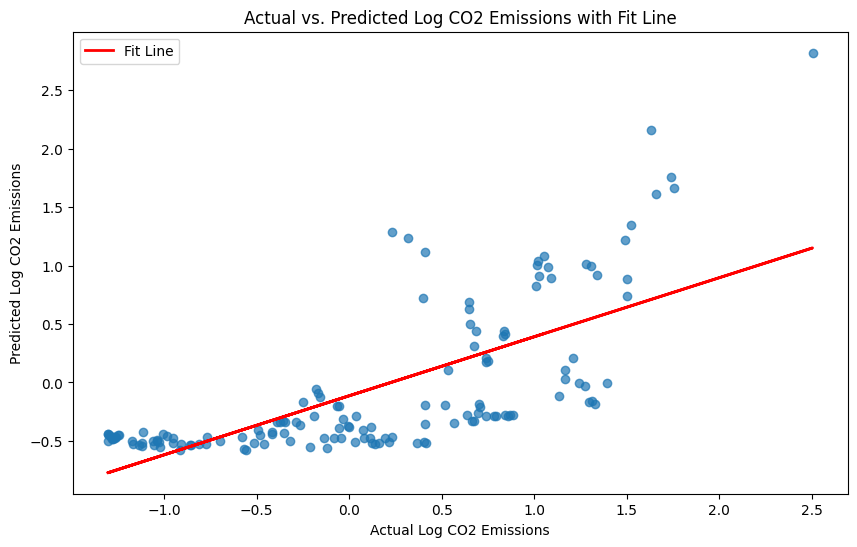

In [24]:
import numpy as np

slope, intercept = np.polyfit(y_test, y_pred, 1)

fit_line = slope * y_test + intercept

# Plot scatter and fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(y_test, fit_line, 'r-', lw=2, label='Fit Line')  # Fit line
plt.xlabel('Actual Log CO2 Emissions')
plt.ylabel('Predicted Log CO2 Emissions')
plt.title('Actual vs. Predicted Log CO2 Emissions with Fit Line')
plt.legend()
plt.show()


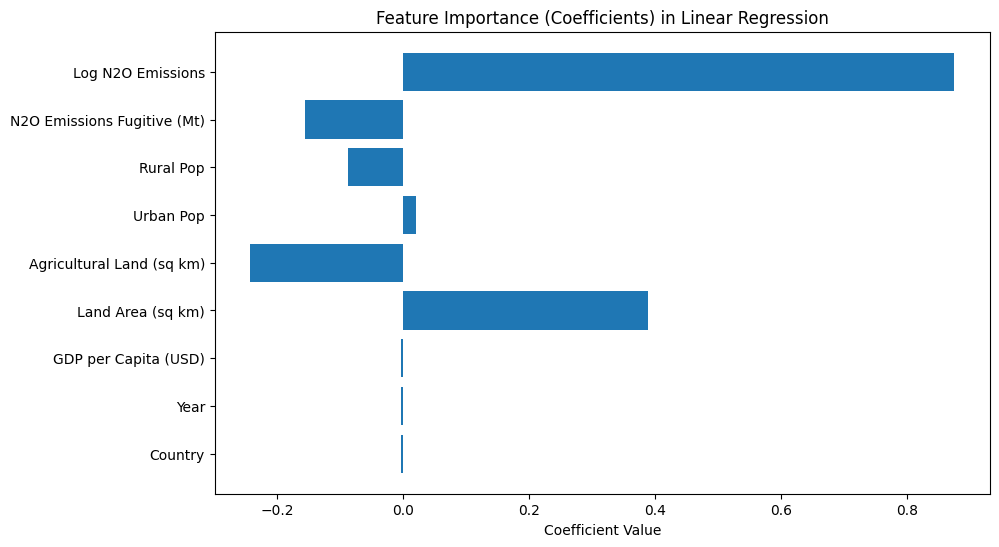

In [25]:
# Feature importance
importance = model.coef_
features_names = features.columns
plt.figure(figsize=(10, 6))
plt.barh(features_names, importance)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients) in Linear Regression')
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# csv_file = pd.read_csv('your_data.csv')

# Drop non-numeric or unnecessary columns
features = csv_file.drop(columns=['Log N2O Emissions','N2O Emissions Fugitive (Mt)'])  # Ensure you drop 'Neighbors'
target = csv_file['Log N2O Emissions']  # Replace with your actual target variable

# Check for and handle missing values
features = features.fillna(0)  # Example: fill missing values with 0
target = target.fillna(target.mean())  # Example: fill missing values with the mean

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.21, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_value = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R value: {r_value}')
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)


Mean Squared Error: 0.10952210675651938
R value: 0.9054699317089026
Coefficient: [ 0.0053418  -0.00059359 -0.0306696  -0.09242681  0.12180548  0.21679731
  0.12297121  0.39645005  0.27935295]
Intercept: 1.044999436395768


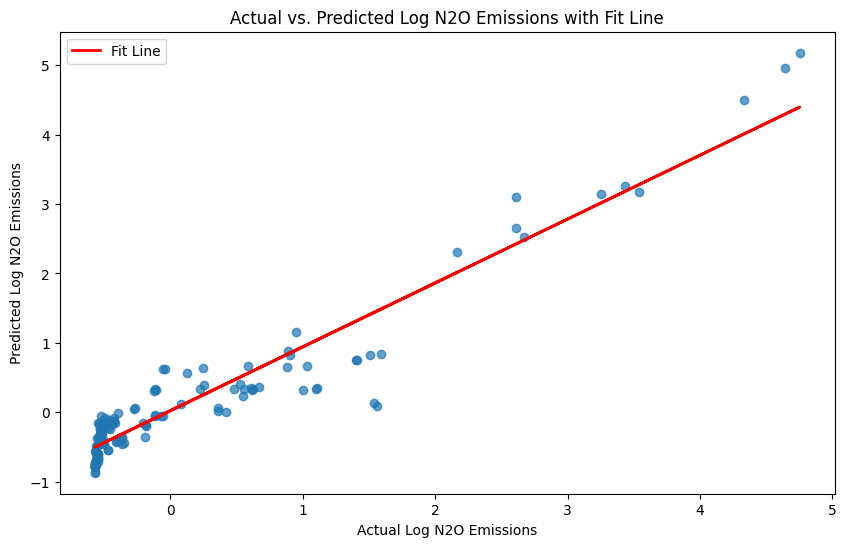

In [27]:
import numpy as np

slope, intercept = np.polyfit(y_test, y_pred, 1)

fit_line = slope * y_test + intercept

# Plot scatter and fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(y_test, fit_line, 'r-', lw=2, label='Fit Line')  # Fit line
plt.xlabel('Actual Log N2O Emissions')
plt.ylabel('Predicted Log N2O Emissions')
plt.title('Actual vs. Predicted Log N2O Emissions with Fit Line')
plt.legend()
plt.show()


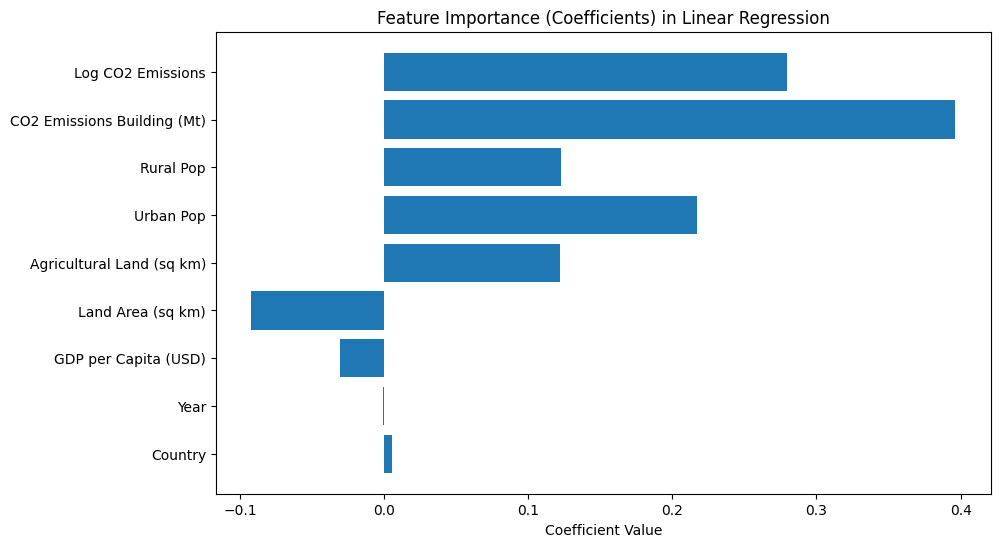

In [28]:
# Feature importance
importance = model.coef_
features_names = features.columns
plt.figure(figsize=(10, 6))
plt.barh(features_names, importance)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients) in Linear Regression')
plt.show()


In [29]:
bins = [-np.inf, csv_file['Log CO2 Emissions'].quantile(0.33), 
        csv_file['Log CO2 Emissions'].quantile(0.66), np.inf]
labels = ['Low', 'Medium', 'High']

csv_file['Emissions_Category'] = pd.cut(csv_file['Log CO2 Emissions'], bins=bins, labels=labels)

In [30]:
# One-hot encode 
#one_hot_encoded = pd.get_dummies(csv_file['Emissions_Category'], prefix='Emissions_Category')
#one_hot_encoded = one_hot_encoded.astype(int) #giving 100%accuracy

#csv_file = pd.concat([csv_file, one_hot_encoded], axis=1)

csv_file


,Country,Year,GDP per Capita (USD),Land Area (sq km),Agricultural Land (sq km),Urban Pop,Rural Pop,N2O Emissions Fugitive (Mt),CO2 Emissions Building (Mt),Log CO2 Emissions,Log N2O Emissions,Emissions_Category
0,0,2010,-0.821359,0.289030,-0.095505,-0.225669,-0.202789,-0.101555,-0.247952,0.353031,-0.474303,Medium
1,0,2011,-0.819552,0.289030,-0.095370,-0.219634,-0.203016,-0.115683,-0.232697,0.407888,-0.475603,Medium
2,0,2012,-0.818813,0.289030,-0.095272,-0.213399,-0.203199,-0.013845,-0.217488,0.457862,-0.448661,High
3,0,2013,-0.817775,0.289030,-0.094950,-0.207005,-0.203353,0.006758,-0.197833,0.516660,-0.444264,High
4,0,2014,-0.814197,0.289030,-0.094956,-0.200466,-0.203491,0.041489,-0.206720,0.490809,-0.434098,High
...,...,...,...,...,...,...,...,...,...,...,...,...
703,58,2017,-0.937686,-0.357671,-0.337773,-0.389150,-0.214732,-0.395296,-0.385662,-0.952274,-0.537405,Low
704,58,2018,-0.936122,-0.357671,-0.337773,-0.388370,-0.213219,-0.395296,-0.384348,-0.907142,-0.534548,Low
705,58,2019,-0.940644,-0.357671,-0.337773,-0.387550,-0.211730,-0.395296,-0.384467,-0.911098,-0.536653,Low
706,58,2020,-0.945555,-0.357671,-0.337773,-0.386656,-0.210214,-0.395885,-0.386325,-0.976421,-0.545251,Low


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and new categorical target
features = csv_file.drop(columns=['Country', 'Year', 'Log CO2 Emissions', 'Emissions_Category'])
target = csv_file['Emissions_Category']  # New categorical target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [32]:
# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.5f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for a deeper analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 85.91549
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.90      0.95        48
         Low       0.73      1.00      0.85        41
      Medium       0.88      0.72      0.79        53

    accuracy                           0.86       142
   macro avg       0.87      0.87      0.86       142
weighted avg       0.88      0.86      0.86       142

Confusion Matrix:
[[43  0  5]
 [ 0 41  0]
 [ 0 15 38]]


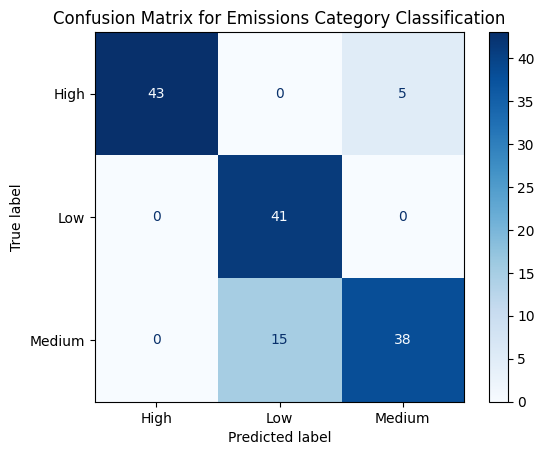

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Emissions Category Classification')
plt.show()


In [35]:
from sklearn.svm import SVC

features = csv_file.drop(columns=['Country', 'Year', 'Log CO2 Emissions', 'Emissions_Category'])
target = csv_file['Emissions_Category']  # Categorical target for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [36]:
# initialize
svm_model = SVC(kernel='linear')  

# train
svm_model.fit(X_train, y_train)#line 

# test
y_pred = svm_model.predict(X_test)#classify

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.5f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 85.21127
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.92      0.96        48
         Low       0.71      1.00      0.83        41
      Medium       0.90      0.68      0.77        53

    accuracy                           0.85       142
   macro avg       0.87      0.87      0.85       142
weighted avg       0.88      0.85      0.85       142

Confusion Matrix:
[[44  0  4]
 [ 0 41  0]
 [ 0 17 36]]


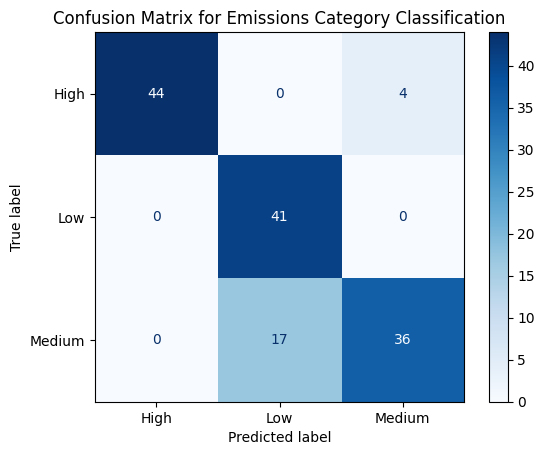

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Emissions Category Classification')
plt.show()


In [39]:
from sklearn.cluster import KMeans

features = csv_file.drop(columns=['Emissions_Category'])


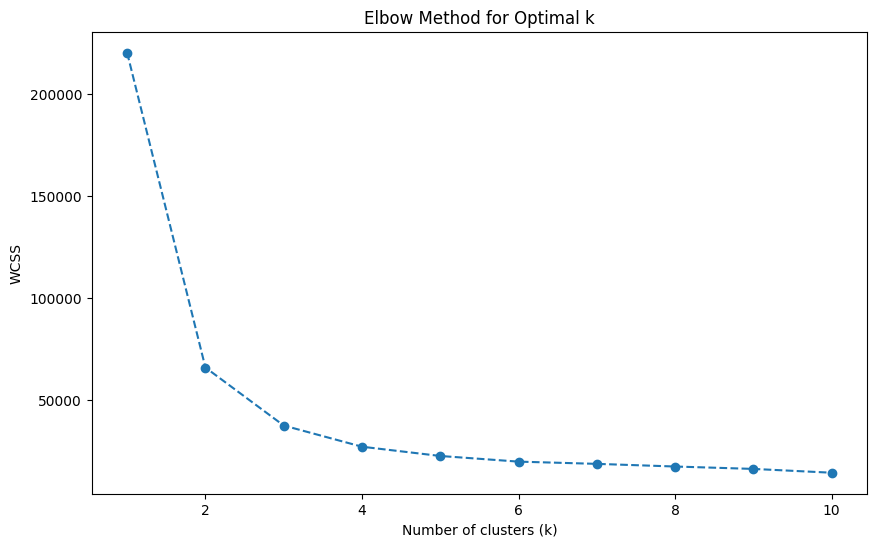

In [40]:
wcss = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)  # Inertia represents WCSS

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [41]:
# Apply K-Means with the chosen number of clusters
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_model.fit_predict(features)

csv_file['Cluster'] = clusters


In [ ]:
csv_file['Country'] = label.inverse_transform(csv_file['Country'])
plot_file = csv_file[['Country','Cluster']]
plot_file.drop_duplicates(inplace=True)
plot_file.reset_index(drop=True, inplace=True)

In [43]:
import pycountry

def get_alpha_3_code(country_name):
    try:
        country = pycountry.countries.get(common_name=country_name)
        if country is None:
            country = pycountry.countries.get(name=country_name)
        return country.alpha_3 if country else None
    except KeyError:
        return None

In [ ]:
plot_file['Country'].iloc[18] = "Congo"
plot_file['Country'].iloc[40] = "North Korea"
plot_file['Country'].iloc[51] = "South Korea"
plot_file['Country'].iloc[21] = "Egypt"
plot_file['Country'].iloc[4] = "Bahamas"


In [ ]:
plot_file['country_code'] = plot_file['Country'].apply(get_alpha_3_code)

In [46]:
plot_file

,Country,Cluster,country_code
0,Algeria,2,DZA
1,Argentina,2,ARG
2,Australia,2,AUS
3,Austria,2,AUT
4,Bahamas,2,BHS
5,Bangladesh,2,BGD
6,Barbados,2,BRB
7,Belgium,2,BEL
8,Bermuda,2,BMU
9,Bhutan,2,BTN


In [47]:
plot_file.isna().sum()

Country         0
Cluster         0
country_code    0
dtype: int64

In [48]:
import plotly.express as px

# Create the choropleth map using Plotly
fig = px.choropleth(
    plot_file,
    locations='country_code', 
    color='Cluster', 
    color_continuous_scale='Viridis',
    title="K-Means Clustering Visualization on World Map",
    labels={'Cluster': 'Cluster Group'}
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.update_layout(margin={"r":0, "t":50, "l":0, "b":0}) 

fig.show()
